# Title: Investigation and Analysis of The TMDB Data

## Author: Maryam Oyeyiola

# Introduction

## Data Set Overview

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Data Set Description

0.  id    --------------------   movie id number
1.  imdb_id      --------------------         movie imdb id string
2.  popularity    --------------------        level of popularity
3.  budget       --------------------         cost of production  
4.  revenue       --------------------        proceeds of production  
5.  original_title  --------------------      movie title 
6.  cast            --------------------      actors names 
7.  homepage        --------------------      movie webpage 
8.  director        --------------------      movie directors 
9.  tagline        --------------------       movie's slogan 
10. keywords       --------------------       movie ciphers or codes
11. overview       --------------------       movie summary 
12. runtime        --------------------       duration of the movie 
13. genres         --------------------       category of the movie 
14. production_companies--------------------  companies involved in the movie production 
15. release_date        --------------------  movie release date 
16. vote_count          --------------------  total count of viewers votes  
17. vote_average       --------------------   average of vote_count
18. release_year       --------------------   year movie was distributed
19. budget_adj         --------------------   cost of production in dollars
20. revenue_adj        --------------------   proceeds of production in dollars


## Analysis Questions


1. Which movie genre is the produced most?
2. Which genre requires a high budget?
3. Which genre pulls in the highest profit for producers?
4. Which actor appeared in the most movies?
5. Which director directed more movies than others?
6. which production company produced the most movies over the years?
7. Which year had the best ratings in the movie industry?
8. Which year had the highest gross profit?
9. Do movies with high ratings have a higher gross profit?
10. What kinds of properties are associated with movies that have high profit?




In [1]:
# imorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

>This dataset was downloaded to my PC from Udacity's [dataset option list](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf). It was then imported to my local environment.

## General Properties

In [2]:
pd.set_option("display.max_columns", None) #display all columns
data = pd.read_csv('tmdb-movies.csv')

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
data.shape

(10866, 21)

## Data Cleaning

#### Cleaning tasks
>- check the sample counts and data types
>- check total of missing values in each column
>- check if there are any duplicated samples

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>The column labels are self explantory, but vote_average will be renamed to 'ratings'

>The data types too have no issues

In [6]:
data = data.rename(columns={'vote_average':'ratings'})

In [7]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
ratings                    0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
data.duplicated().sum()

1

#### Handling Missing values


>- **"homepage"** is the feature with the highest missing values. The column can be dropped entirely as the column does not seem to have any relevance to the posed questions. 

>- The **"tagline" and "Keywords"** column will also be dropped for the same reason.

>- Missing rows in columns **['imdb_id', 'cast', 'director','overview', 'genre', 'production companies']** will be dropped for the same reason.

#### Handling duplicates

- Only one duplicated entry, this will also be dropped

In [9]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'ratings', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [10]:
data = data.drop(['id', 'imdb_id','homepage','tagline','keywords', 'overview'], axis=1)

In [11]:
data.shape[0]

10866

In [12]:
data = data.dropna()
data.shape[0]

9773

>is the duplicate sample still in the data or it has bee removed with the null values?

In [13]:
data.duplicated().sum()

1

In [14]:
data[data.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,ratings,release_year,budget_adj,revenue_adj
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


>After examining the duplicate, one of them can be dropped. The number of rows in the data should only reduce by 1

In [15]:
data = data.drop_duplicates()
data.shape[0]

9772

>Now, the data is fairly clean. Time to confirm if the data indeed has zero nulls and duplicates

In [16]:
data.isnull().any().sum()

0

In [17]:
data.duplicated().any().sum()

0

In [18]:
data.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
ratings                 float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Exploratory Data Analysis

>Now that the data is clean, time to investigave the dataset by answering posed questions

## Which genre is the most popular?

In [19]:
data.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [20]:
data.release_year.describe() #basic statistics

count    9772.000000
mean     2000.878428
std        13.036794
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

>resource: [stack() documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)

In [21]:
# frequency of movie genre
genre_freq=data.genres.str.split('|', expand=True).stack().value_counts().sort_values(ascending=True)
genre_freq

Foreign             120
TV Movie            132
Western             160
War                 258
History             306
Documentary         317
Music               339
Animation           617
Mystery             773
Fantasy             840
Family             1095
Science Fiction    1136
Crime              1299
Adventure          1384
Horror             1526
Romance            1570
Action             2235
Thriller           2746
Comedy             3433
Drama              4364
dtype: int64

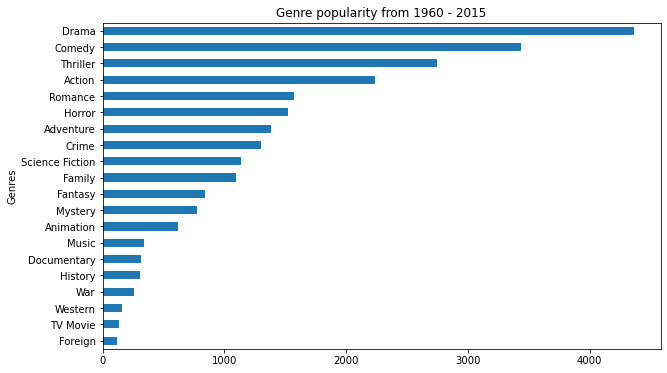

In [22]:
# plot frequency result
genre_freq.plot(kind= 'barh', figsize=(10,6),title='Genre popularity from 1960 - 2015', xlabel= 'Genres');

The most popular movie genre is 'Drama' while 'Foriegn' movies are the least

## Which genre requires a high budget?

>resource: [explode function](https://thats-it-code.com/pandas/how-to-convert-multivalue-column-to-multiple-rows/)

In [23]:
# extract subdata
genre_budget = data[['genres','budget']]

In [24]:
genre_budget['genres'] = genre_budget.genres.str.split('|')

In [25]:
# convert genre list to multiple columns
genre_budget=genre_budget.explode('genres')

In [26]:
genre_budget.head(3)

,genres,budget
0,Action,150000000
0,Adventure,150000000
0,Science Fiction,150000000


In [27]:
genres_budget_avg = genre_budget.groupby('genres')['budget'].mean().sort_values()

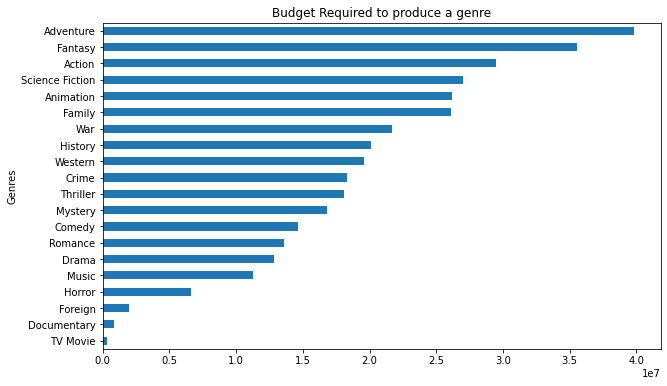

In [28]:
genres_budget_avg.plot(kind= 'barh', figsize=(10,6),title='Budget Required to produce a genre', xlabel= 'Genres');

>Even though Comedy and Drama genre are the most produced movie genres, they do not need a very high budget to produce. Adventure being the genre that requires a very high budget is understandable. According to [Rotten Tomatoes](https://editorial.rottentomatoes.com/guide/adventure-movies/) Adventure genre is a combination of any number of the other genres, including fantasy and science-fiction. 

>An adventure genre kind of movie should run on the thrill of exploration and discovery, treading deep into jungles, stalking across arid deserts, or sailing across open oceans. The casts of characters feature rambunctious pirates, lordly counts, mercenaries and bounty hunters, big whales, and even bigger apes.

## Which genre pulls in the highest profit for producers?

>To calculate profit made from each movie, the budget of making the movie will be subtracted from the revenue generated by the movie

In [29]:
data['profit'] = data['revenue_adj'] - data['budget_adj']

In [30]:
genre_profit = data[['genres','profit']]

In [31]:
genre_profit['genres'] = genre_profit['genres'].str.split('|')

In [32]:
genre_profit = genre_profit.explode('genres')

In [33]:
genre_profit.head(1)

,genres,profit
0,Action,1.254446e+09


In [34]:
genre_profit_avg = genre_profit.groupby('genres')['profit'].mean().sort_values()

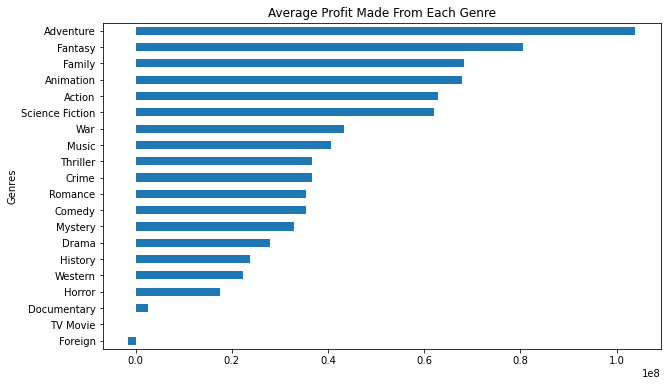

In [35]:
genre_profit_avg.plot(kind= 'barh', figsize=(10,6),
                      title='Average Profit Made From Each Genre', xlabel= 'Genres');

>Adventure movies may require a high budget, but they also rake high profits. So far we know the most popular genre is Drama and Comedy. A movie that has a cmbination of Drama, Comedy and Adventure, will surely break the box office and put a smile on the producers' faces.

## Which actor appeared in the most movies

In [36]:
actors = data.cast.str.split('|', expand=True)
actors = actors.stack().value_counts().sort_values(ascending=True).tail(15)
actors

Dennis Quaid         45
Julianne Moore       46
Tom Hanks            46
Alec Baldwin         47
Susan Sarandon       47
Liam Neeson          47
John Cusack          48
John Goodman         48
Morgan Freeman       49
Robin Williams       51
Michael Caine        52
Nicolas Cage         61
Bruce Willis         62
Samuel L. Jackson    70
Robert De Niro       72
dtype: int64

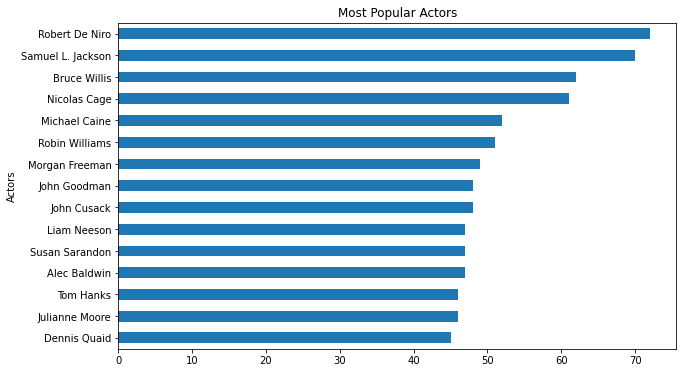

In [37]:
actors.plot(kind= 'barh', figsize=(10,6),title='Most Popular Actors', xlabel= 'Actors');

>Samuel L. Jackson is only two movies behind Robert De Niro. But that does not mean Samuel L. Jackson is not popular in the movie industry.

## Who is the most popular director?

In [38]:
director= data.director.value_counts().head(1)
director

Woody Allen    42
Name: director, dtype: int64

In [39]:
woody = data.query('director == "Woody Allen"')
woody

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,ratings,release_year,budget_adj,revenue_adj,profit
155,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,95,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015,1.012000e+07,2.519979e+07,1.507979e+07
790,0.889247,0,32339326,Magic in the Moonlight,Colin Firth|Emma Stone|Hamish Linklater|Marcia...,Woody Allen,97,Comedy|Drama|Romance,Perdido Productions|Harbor Picture Company,7/25/14,464,6.3,2014,0.000000e+00,2.978746e+07,2.978746e+07
1332,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,Comedy|Drama|Romance,United Artists,4/19/77,493,7.6,1977,1.439112e+07,1.376203e+08,1.232291e+08
1489,0.804857,15000000,0,Whatever Works,Larry David|Evan Rachel Wood|Adam Brooks|Micha...,Woody Allen,92,Comedy|Romance,Sony Pictures Classics|Wild Bunch|Gravier Prod...,6/19/09,174,6.7,2009,1.524601e+07,0.000000e+00,-1.524601e+07
2126,0.493121,22000000,0,You Will Meet a Tall Dark Stranger,Naomi Watts|Josh Brolin|Antonio Banderas|Ewen ...,Woody Allen,98,Comedy|Drama|Romance,Antena 3 Films,5/23/10,131,5.8,2010,2.200000e+07,0.000000e+00,-2.200000e+07
2551,0.281948,0,0,Sweet and Lowdown,Woody Allen|Ben Duncan|Daniel Okrent|Dan Moran...,Woody Allen,95,Comedy|Drama,Sweetland Films|Magnolia Productions,12/3/99,48,6.5,1999,0.000000e+00,0.000000e+00,0.000000e+00
2744,0.446532,0,0,The Curse of the Jade Scorpion,Woody Allen|Helen Hunt|John Tormey|John Schuck...,Woody Allen,103,Comedy|Crime|Mystery|Romance|Thriller,DreamWorks SKG|Gravier Productions,8/5/01,77,6.1,2001,0.000000e+00,0.000000e+00,0.000000e+00
2964,0.866771,15000000,96408652,Vicky Cristina Barcelona,Scarlett Johansson|Rebecca Hall|Javier Bardem|...,Woody Allen,96,Drama|Romance,The Weinstein Company|Gravier Productions|Ante...,8/15/08,563,6.7,2008,1.519180e+07,9.764139e+07,8.244959e+07
3429,1.367727,30000000,151119219,Midnight in Paris,Owen Wilson|Rachel McAdams|Kurt Fuller|Mimi Ke...,Woody Allen,94,Fantasy|Comedy|Romance,Gravier Productions|TelevisiÃ³ de Catalunya (T...,5/11/11,1117,7.2,2011,2.908194e+07,1.464947e+08,1.174127e+08
4046,0.444428,16000000,0,Hollywood Ending,Woody Allen|George Hamilton|TÃ©a Leoni|Debra M...,Woody Allen,112,Comedy|Drama,DreamWorks SKG,5/3/02,54,6.2,2002,1.939618e+07,0.000000e+00,-1.939618e+07


### The genre Woody Allen directs most

In [40]:
woody_genre = woody.genres.str.split('|', expand=True).stack().value_counts().sort_values(ascending=True)
woody_genre

History             1
Science Fiction     1
Fantasy             2
Action              3
Mystery             4
Crime               6
Thriller            6
Romance            20
Drama              21
Comedy             38
dtype: int64

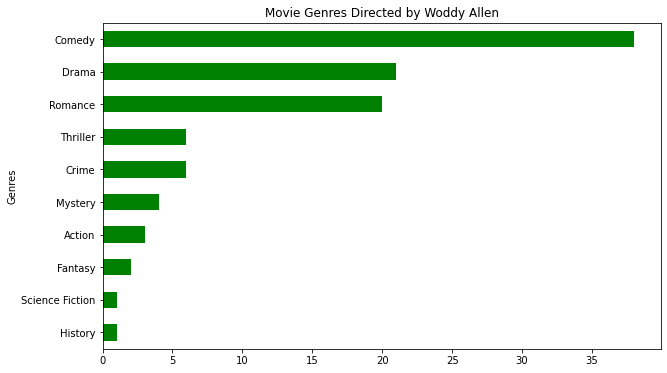

In [41]:
woody_genre.plot(kind= 'barh', color='green', figsize=(10,6),title='Movie Genres Directed by Woddy Allen', xlabel= 'Genres');

In [42]:
print('The highest budget Woody Allen has worked with is ${max_budget}'.format(max_budget= woody.budget_adj.max()))
print('The lowest budget Woody Allen has worked with is ${min_budget}'.format(min_budget= woody.budget_adj.min()))

The highest budget Woody Allen has worked with is $33420713.8418218
The lowest budget Woody Allen has worked with is $0.0


>This output cannot be right. Woody Allen or any director would not work on a movie without budget. This probably means the data is just unavailable. Even though we are able to output a figure for the highest budget, the answer is still not certain, because the unavalible data might just be a figure higher than the output, but this is still something.

In [43]:
woody.query('budget_adj == 33420713.8418218')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,ratings,release_year,budget_adj,revenue_adj,profit
9238,0.415913,19000000,18254702,Crimes and Misdemeanors,Woody Allen|Martin Landau|Anjelica Huston|Joan...,Woody Allen,104,Comedy|Drama,Orion Pictures|Jack Rollins & Charles H. Joffe...,10/13/89,86,6.9,1989,3.342071e+07,3.210975e+07,-1.310968e+06


>According to the data, the movie Woody Allen spent the most money on was released back in 1989, 26 years before his latest release in 2015. The movie is a combination of drama and comedy, the top 2 genres that Woody Allen directs most.

## Which production company has produced the most movies over the years?

In [44]:
prod_comp = data.production_companies.str.split('|', expand=True).stack().value_counts().sort_values(ascending=True)
prod_comp = prod_comp.tail(10)
prod_comp

Columbia Pictures Corporation             160
Touchstone Pictures                       178
Walt Disney Pictures                      213
Metro-Goldwyn-Mayer (MGM)                 218
New Line Cinema                           219
Columbia Pictures                         272
Twentieth Century Fox Film Corporation    282
Paramount Pictures                        431
Warner Bros.                              509
Universal Pictures                        522
dtype: int64

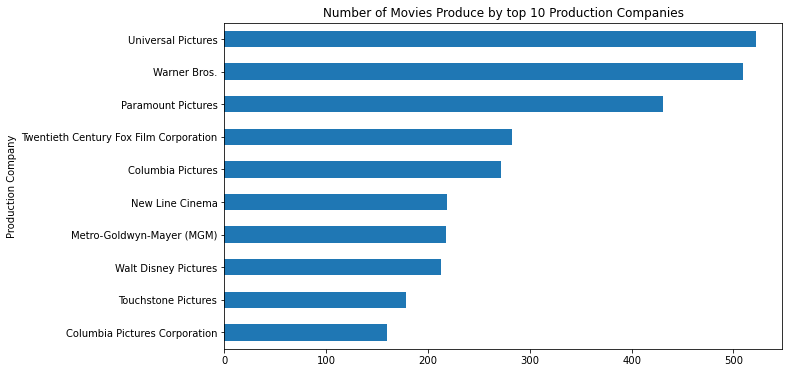

In [45]:
prod_comp.plot(kind= 'barh',figsize=(10,6),
               title='Number of Movies Produce by top 10 Production Companies', 
               xlabel= 'Production Company');

## which year had the best ratings in the movie industry?

In [46]:
best_ratings = data.groupby('release_year')['ratings'].mean()
best_ratings

release_year
1960    6.325000
1961    6.433333
1962    6.386667
1963    6.329412
1964    6.224390
1965    6.188235
1966    6.086364
1967    6.319444
1968    6.370270
1969    5.944828
1970    6.502500
1971    6.420000
1972    6.524324
1973    6.703636
1974    6.404545
1975    6.452381
1976    6.371739
1977    6.141818
1978    6.139344
1979    6.296429
1980    6.145205
1981    6.152564
1982    6.230000
1983    5.951948
1984    6.010101
1985    6.184906
1986    6.060550
1987    6.149558
1988    5.931061
1989    6.072656
1990    5.967460
1991    6.050400
1992    6.046825
1993    6.038953
1994    5.940230
1995    6.072353
1996    5.867857
1997    5.997778
1998    5.983246
1999    6.052358
2000    5.866837
2001    5.907547
2002    5.950207
2003    5.925197
2004    5.963636
2005    5.820433
2006    5.939143
2007    5.944730
2008    5.925850
2009    5.838397
2010    5.963095
2011    5.932018
2012    5.750602
2013    5.863316
2014    5.886614
2015    5.825627
Name: ratings, dtype: float64

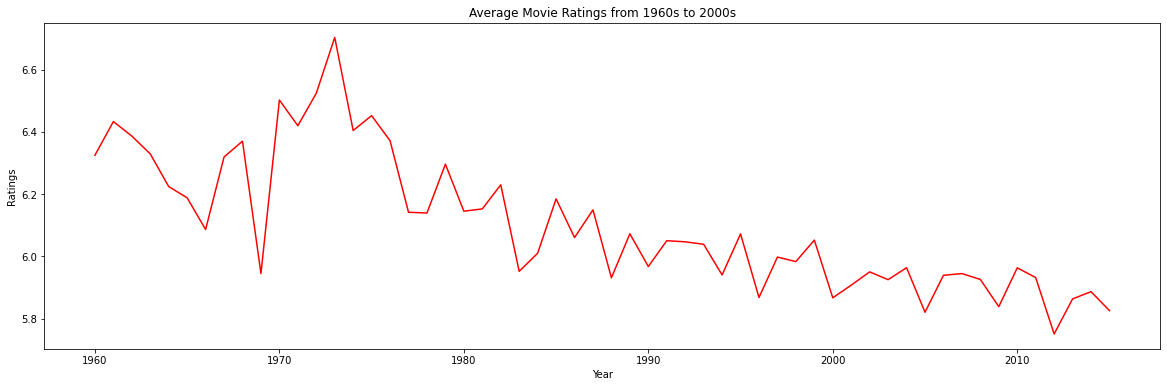

In [47]:
best_ratings.plot(kind= 'line', color='red', figsize=(20,6),
                                  title='Average Movie Ratings from 1960s to 2000s', 
                                  xlabel= 'Year', ylabel='Ratings');

In [48]:
sorted_ratings = best_ratings.sort_values()
print('The year with the best rating in the movie industry is {high} with a rating of {hrating}'
      .format(high=sorted_ratings.index[-1], hrating=round(sorted_ratings.max(),1)))

print('The year with the least rating in the movie industry is {low} with a rating of {lrating}'
      .format(low=sorted_ratings.index[0], lrating=round(sorted_ratings.min(),1)))

The year with the best rating in the movie industry is 1973 with a rating of 6.7
The year with the least rating in the movie industry is 2012 with a rating of 5.8


## Which year had the highest gross profit?

In [49]:
data.profit.describe()

count    9.772000e+03
mean     3.763710e+07
std      1.314756e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      2.029698e+07
max      2.750137e+09
Name: profit, dtype: float64

>Looking at the statistical summary of the profit column, there are movies that made losses. Now to examine the distribution of prodits made in the industry from 1960 - 2015

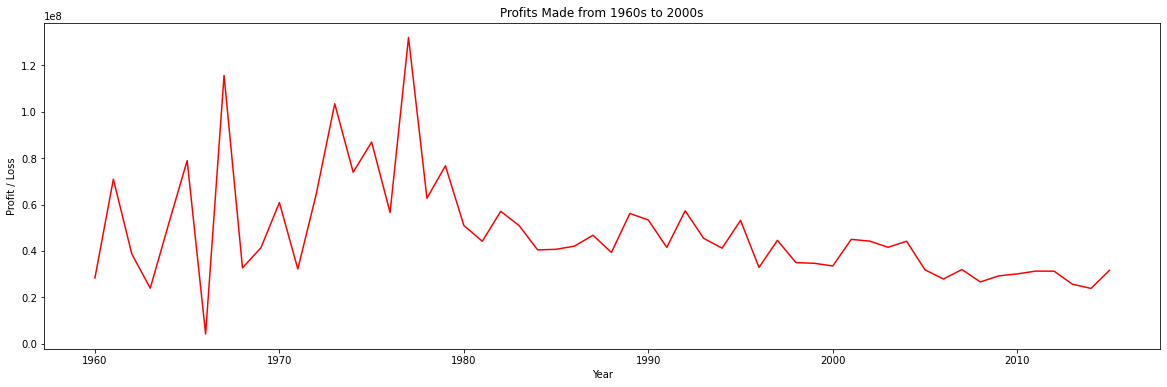

In [50]:
profit_loss = data.groupby('release_year')['profit'].mean()
profit_loss.plot(kind= 'line', color='red', figsize=(20,6),
                                  title='Profits Made from 1960s to 2000s', 
                                  xlabel= 'Year', ylabel='Profit / Loss');

>The line plot for yearly movie ratings and yearly profits seem to follow the same trend. Does this mean that the higher the rating for a movie, the higher the profits or the lower ratings means loss for the producers?
Time to see if ratings and profits are correlated.

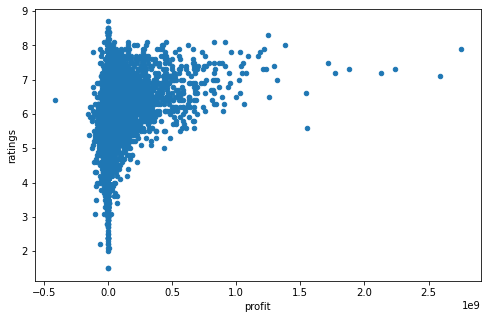

In [51]:
data.plot(x='profit',y='ratings',kind='scatter',figsize=(8,5));

>Profit and Ratings are somewhat correlated. The dot to the far left seems to have a high rating, but the profit is low, while the one on the far right has a high raing and a high profit as well.

In [52]:
sorted_profit = profit_loss.sort_values()
print('The year in which high profit was made on movies is {high} with a rating of {hprofit}'
      .format(high=sorted_profit.index[-1], hprofit=round(sorted_profit.max(),1)))

The year in which high profit was made on movies is 1977 with a rating of 132071477.6


## Do movies with high ratings have a higher gross profit?

>This should tally with movies with high profits and most popular genre

In [53]:
ratings_median = data['ratings'].median()
high_rating = data.query('ratings >= {}'.format(ratings_median))
low_rating = data.query('ratings < {}'.format(ratings_median))

In [54]:
mean_high_rating = high_rating.profit.mean()
mean_low_rating = low_rating.profit.mean()

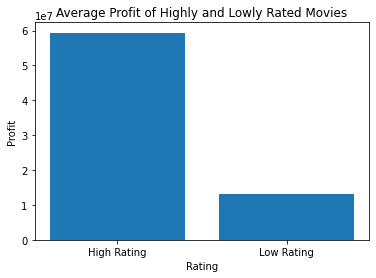

In [55]:
plt.bar(['High Rating', 'Low Rating'], [mean_high_rating, mean_low_rating]) #labels, height
plt.title('Average Profit of Highly and Lowly Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Profit')
plt.show()

In [56]:
high_rating

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,ratings,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00,-4.702610e+06
10859,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000e+00,0.000000e+00,0.000000e+00
10860,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000e+00,0.000000e+00,0.000000e+00
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,0.000000e+00


Yes, movies that have high ratings also have high profits.

In [57]:
high_profit_genre = high_rating.genres.str.split('|', expand=True).stack().value_counts()
low_profit_genre = low_rating.genres.str.split('|', expand=True).stack().value_counts()

In [58]:
high_profit_genre

Drama              2763
Comedy             1668
Thriller           1237
Action             1051
Romance             895
Crime               789
Adventure           733
Family              584
Science Fiction     490
Animation           449
Horror              433
Fantasy             416
Mystery             415
Documentary         290
Music               242
History             237
War                 177
Western              97
Foreign              65
TV Movie             56
dtype: int64

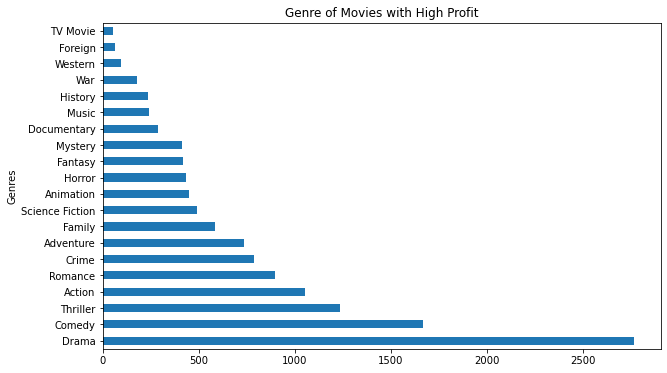

In [59]:
high_profit_genre.plot(kind= 'barh', figsize=(10,6),title='Genre of Movies with High Profit', xlabel= 'Genres');

In [60]:
low_profit_genre

Comedy             1765
Drama              1601
Thriller           1509
Action             1184
Horror             1093
Romance             675
Adventure           651
Science Fiction     646
Family              511
Crime               510
Fantasy             424
Mystery             358
Animation           168
Music                97
War                  81
TV Movie             76
History              69
Western              63
Foreign              55
Documentary          27
dtype: int64

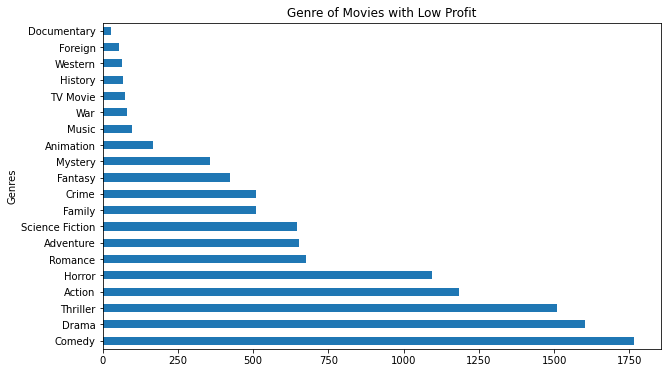

In [61]:
low_profit_genre.plot(kind= 'barh', figsize=(10,6),title='Genre of Movies with Low Profit', xlabel= 'Genres');

It is true that the most produced movie genres includes Comedy and Drama and they grossed the highest profit. The genres also recieve low ratings. While we have established that rating does contribute to profits, we can conclude that genre of movies do not explicitly result in high ratings or high profits. 

If genre does result in a high rating or high profit, the low rating dataframe would not have genres like comedy or drama since they are the most popular.

## What kinds of properties are associated with movies that have high profit?

>This question will be answered with the following features: [popularity, rating, budget, revenue]

In [62]:
data.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,ratings,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [63]:
def plot(data,x,y,kind): #take a number of parameters and plots 
    data.plot(x=x, y=y, kind=kind, figsize=(5,3));

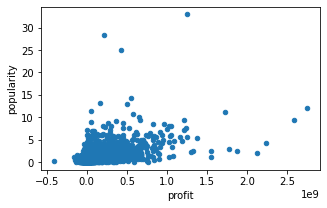

In [64]:
## Is movie popularity related to Profit?
plot(data, 'profit','popularity','scatter')

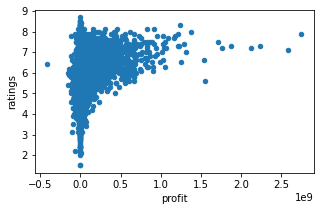

In [65]:
## Is movie rating related to Profit?
plot(data, 'profit','ratings','scatter')

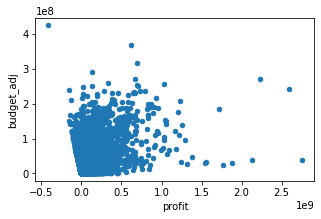

In [66]:
## Is movie budget related to Profit?
plot(data, 'profit','budget_adj','scatter')

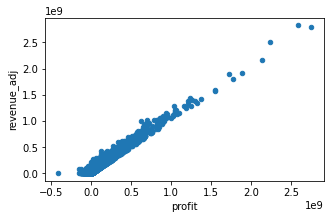

In [67]:
## Is revenue generated related to Profit?
plot(data, 'profit','revenue_adj','scatter')

The only obvious property that seems to be correlated with profit is revenue. The higher the revenue a movie generates, the higher the profit that movie is likely to make. This means revenue and profit have positive correlation with each other. The other features seem to have no significant correlation with profit

# Conclusions

>I had a lot of fun working with this dataset. AS a movie enthusiast, analyzing a dataset like this was such a thrill. Now I know more about the movie industry. Prior to working on this project, I had no idea who Woody Allen was. Now, I know he is a director that produced the mot movies from 1960 - 2015. I do not think i'll ever forget Woody Allen's name and his role in movies'. I do love comedy and drama genre, so I was not dissapointed they were the top genres.

>Naturally, I expected comey and drama genre to have the highest profit average, but I am not mad that adventure genre took that. I trust the data and the analysis.

>My love for movies and my curiousity prompted these much questions and I am glad I was able to manipulate the data to be able to answer my questions and draw conclusions as well.



# Limitations

>The only downside to the data is the inconsistent entries of some values, such as budget and revenue that have 0-values. I know for sure, there can't be a movie out there that has no budget. At least not in the movie industry. Aside that, I had a lot of fun and I learned a lot.